In [1]:
import tensorflow as tf


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn 

In [3]:
# import zipfile
# import wget
# url='https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
# wget.download(url)



In [4]:
# zip_ref=zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [5]:
import os

In [6]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
for dirpath,dirname,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak\test'
There are 0 directories and 250 images in 'pizza_steak\test\pizza'
There are 0 directories and 250 images in 'pizza_steak\test\steak'
There are 2 directories and 0 images in 'pizza_steak\train'
There are 0 directories and 750 images in 'pizza_steak\train\pizza'
There are 0 directories and 750 images in 'pizza_steak\train\steak'


**"Getting labels programatically"**

In [8]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.image as mpimg
import random

In [10]:
def view_random_images(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img


['938821.jpg']
Image shape: (384, 512, 3)


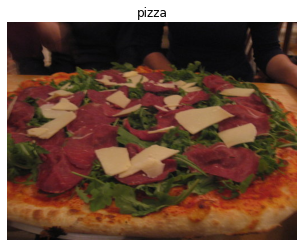

In [11]:
img=view_random_images(target_dir="pizza_steak/train/",target_class='pizza')

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
test_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


"Building Tiny VGG"

In [14]:
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [15]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data))

Epoch 1/5
47/47 [==============================] - 27s 408ms/step - loss: 0.5577 - accuracy: 0.7027
Epoch 2/5
47/47 [==============================] - 4s 75ms/step - loss: 0.4156 - accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 4s 74ms/step - loss: 0.3695 - accuracy: 0.8327
Epoch 4/5
47/47 [==============================] - 4s 74ms/step - loss: 0.3350 - accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 4s 75ms/step - loss: 0.3218 - accuracy: 0.8640
